# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
print(app_train.shape)
app_train

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [13]:
app_train.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
SK_ID_CURR,1.000000,-0.002108,0.001654,0.001216,0.000703,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,...,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659,0.001368
TARGET,-0.002108,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,...,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930,-0.045987
NAME_CONTRACT_TYPE,0.001654,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,...,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494,-0.054967
FLAG_OWN_CAR,0.001216,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,...,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345,-0.154778
FLAG_OWN_REALTY,0.000703,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,...,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451,0.070107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_WEEK,0.002099,0.000788,-0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,...,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917,0.003043
AMT_REQ_CREDIT_BUREAU_MON,0.000485,-0.012462,-0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,...,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975,-0.034111
AMT_REQ_CREDIT_BUREAU_QRT,0.001025,-0.002022,-0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,...,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208,0.015252
AMT_REQ_CREDIT_BUREAU_YEAR,0.004659,0.019930,-0.052494,-0.036345,0.067451,-0.041550,0.011690,-0.048448,-0.011320,-0.050998,...,-0.007009,-0.012126,-0.005457,-0.004597,-0.003355,0.018917,-0.004975,0.076208,1.000000,0.050001


In [14]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [15]:
df = app_train.corr()['TARGET']
df

SK_ID_CURR                   -0.002108
TARGET                        1.000000
NAME_CONTRACT_TYPE           -0.030896
FLAG_OWN_CAR                 -0.021851
FLAG_OWN_REALTY              -0.006148
                                ...   
AMT_REQ_CREDIT_BUREAU_WEEK    0.000788
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_REQ_CREDIT_BUREAU_QRT    -0.002022
AMT_REQ_CREDIT_BUREAU_YEAR    0.019930
DAYS_EMPLOYED_ANOM           -0.045987
Name: TARGET, Length: 110, dtype: float64

In [39]:
df.sort_values(ascending=False)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
                                 ...   
DAYS_EMPLOYED_ANOM            -0.045987
DAYS_BIRTH                    -0.078239
EXT_SOURCE_1                  -0.155317
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_3                  -0.178919
Name: TARGET, Length: 110, dtype: float64

In [40]:
df.sort_values(ascending=False).head(15)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [41]:
df.sort_values(ascending=False).tail(15)

LIVINGAREA_AVG               -0.032997
FLOORSMIN_MEDI               -0.033394
FLOORSMIN_AVG                -0.033614
ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED_ANOM           -0.045987
DAYS_BIRTH                   -0.078239
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64

In [44]:
#最大正相關度特徵值 : DAYS_EMPLOYED
app_train['DAYS_EMPLOYED'].value_counts()

-200.0      156
-224.0      152
-199.0      151
-230.0      151
-212.0      150
           ... 
-13032.0      1
-14968.0      1
-11101.0      1
-9816.0       1
-12537.0      1
Name: DAYS_EMPLOYED, Length: 12573, dtype: int64

In [80]:
sub_df = app_train[~app_train['DAYS_EMPLOYED'].isnull()]
sub_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,F,0,1,0,153000.0,331920.0,16096.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
307506,456251,0,0,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,False
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,False
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


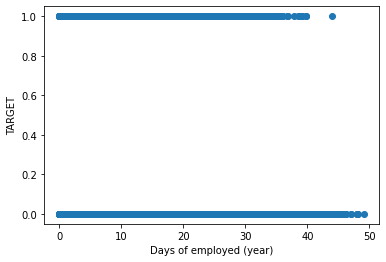

Correlation: 0.074958


In [81]:
# plt.plot(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['TARGET'], '.')
plt.scatter(sub_df['DAYS_EMPLOYED'] / (-365), sub_df['TARGET'])
plt.xlabel('Days of employed (year)')
plt.ylabel('TARGET')
plt.show()

corr = np.corrcoef(sub_df['DAYS_EMPLOYED'] / (365), sub_df['TARGET'])
print("Correlation: %.6f" % (corr[0][1]))


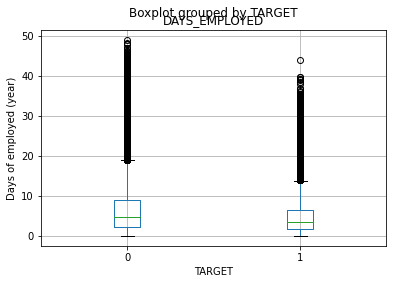

In [82]:
#遇到 y 的本質不是連續數值時, 從上圖, 看不出實際關係
#調整方式: 換一個角度來看 : x, y 軸對調, 畫boxplot
sub1_df = sub_df[['DAYS_EMPLOYED','TARGET']].copy()
sub1_df['DAYS_EMPLOYED'] = sub1_df['DAYS_EMPLOYED'] / (-365)

sub1_df.boxplot(column=['DAYS_EMPLOYED'], by='TARGET')
plt.xlabel('TARGET')
plt.ylabel('Days of employed (year)')
plt.show()

In [83]:
#最大負相關度特徵值; EXT_SOURCE_3
app_train['EXT_SOURCE_3'].isnull().sum()
#去除nan值
sub_df = app_train[~app_train['EXT_SOURCE_3'].isnull()]
sub_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_EMPLOYED_ANOM
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,False
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
5,100008,0,0,M,0,1,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,False
6,100009,0,0,F,1,1,1,171000.0,1560726.0,41301.0,...,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0,False
7,100010,0,0,M,1,1,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307503,456247,0,0,F,0,1,0,112500.0,345510.0,17770.5,...,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0,False
307505,456249,0,0,F,0,1,0,112500.0,225000.0,22050.0,...,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0,True
307508,456253,0,0,F,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,False
307509,456254,1,0,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,False


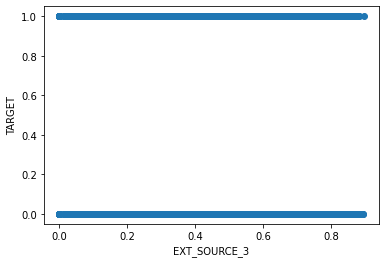

Correlation: -0.178919


-0.1789186976283708

In [86]:
# plt.plot(sub_df['EXT_SOURCE_3'] , sub_df['TARGET'], '.')
plt.scatter(sub_df['EXT_SOURCE_3'] , sub_df['TARGET'])
plt.xlabel('EXT_SOURCE_3')
plt.ylabel('TARGET')
plt.show()

corr = np.corrcoef(sub_df['EXT_SOURCE_3'], sub_df['TARGET'])
print("Correlation: %.6f" % (corr[0][1]))

# pandas也可以用這樣寫法: 計算兩欄位間的相關係數corr:
sub_df['EXT_SOURCE_3'].corr(sub_df['TARGET'])

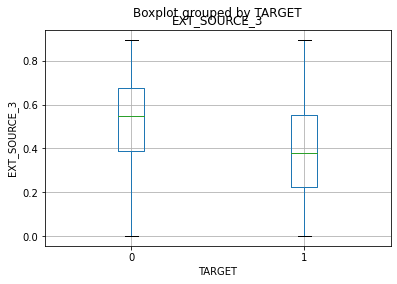

In [87]:
#遇到 y 的本質不是連續數值時, 從上圖, 看不出實際關係
#調整方式: 換一個角度來看 : x, y 軸對調, 畫boxplot
sub_df.boxplot(column=['EXT_SOURCE_3'], by='TARGET')
plt.xlabel('TARGET')
plt.ylabel('EXT_SOURCE_3')
plt.show()

In [ ]:
#補充: Correlation Coefficient 相關係數
'''
相關係數是其中一個常用來了解"各個欄位"與我們想要"預測的目標"之間的關係的指標。
Correlation Coefficient (相關係數) 是一個介於 -1～1 之間的值，負值代表負相關，正值代表正相關，數值的大小代表相關性的強度

.00-.19: 非常弱相關
.20-.39: 弱相關
.40-.59: 中度相關
.60-.79: 強相關
.80-1.0: 非常強相關

'''